# Analyzing AMD

In this activity, you will calculate the daily returns and then plot the results in order to evaluate a potential investment opportunity. 

Instructions:

1. Import the required libraries and dependencies.

2. Using the `read_csv` function and the `Path` module, read `amd_stock_data.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then confirm that Pandas correctly imported the data by using both the `head` and the `tail` function.

    > **Hint** By using both `head` and `tail` to review the DataFrame, you’ll know both the start and the end date for the dataset. The end date will prove especially important as you work through the activity.

3. Check the DataFrame for missing values by using the `isnull` function.

4. Generate summary statistics for the DataFrame by using the `describe` function.

5. Drop the `volume`, `open`, `high`, and `low` columns. (You need only the `close` column for the daily returns.)

    > **Hint** For more info about dropping columns, refer to the [pandas.DataFrame.drop page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

6. Use the `pct_change` function together with the `dropna` function to calculate the daily returns DataFrame for AMD.

7. For the daily returns DataFrame, use `loc` to select slices from the `date` index to create date ranges of 1, 3, 5, and 10 years. Set each subset equal to a new variable (for example, `daily_return_1_year`) to use later.

    > **Hint** Remember that you select date ranges by using label indexing: `loc[start_date:end_date]`. To ensure that you’re analyzing the most current part of the DataFrame, your end date should equal the last date in the index. You know that date, because you confirmed the DataFrame import by using the `tail` function! You determine the time frames by changing the start date. Your date format should mimic the format of the index values.

8. Generate summary statistics for each subset&mdash;that is, the 1-year, 3-year, 5-year, and 10-year periods.

9. Use the default `plot` function to visualize the daily returns for each time period. Be sure to include a `title`, and adjust the figure size as needed.

10. Determine the time period that has the highest return value and the one that has the lowest. What are the implications of your findings?


References:

[Pandas loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

[Pandas describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

[Pandas plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)



## Step 1: Import the required libraries and dependencies.

In [1]:

import pandas as pd
from pathlib import Path



## Step 2: Using the `read_csv` function and the `Path` module, read `amd_stock_data.csv` into a Pandas DataFrame. Be sure to set the `DateTimeIndex`. Then confirm that Pandas correctly imported the data by using both the `head` and the `tail` function.

In [2]:
# Using the read_csv function and the Path module, read in the "amd_stock_data.csv" file from the Resources folder.
# Set the `date` as the index column. 
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
csvpath = Path("./amd_stock_data.csv")
amd_df = pd.read_csv(csvpath, index_col="date",parse_dates=True,infer_datetime_format=True)
amd_df.head()
amd_df.tail()
# Review the DataFrame with both the head & tail functions

    

,close,volume,open,high,low
date,,,,,
2019-04-23,27.97,41583740,28.18,28.49,27.79
2019-04-24,28.46,51487330,28.10,28.85,27.93
2019-04-25,27.66,56709000,28.67,28.86,27.36
2019-04-26,27.88,48736860,27.66,27.90,27.05
2019-04-29,27.69,44265600,27.90,28.14,27.50


## Step 3: Check the DataFrame for missing values by using the `isnull` function.

In [3]:
# Using the Pandas isnull function in conjunction with the sum function, check the DataFrame for missing values
# YOUR CODE HERE
amd_df.isnull().sum()


close     0
volume    0
open      0
high      0
low       0
dtype: int64

## Step 4:Generate summary statistics for the DataFrame by using the `describe` function.

In [4]:
# Use the Pandas describe function to generate summary statistics for the DataFrame
# YOUR CODE HERE

amd_df.describe()

,close,volume,open,high,low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,9.450000,4.286763e+07,9.450000,9.590000,9.260000
max,32.720000,3.238445e+08,33.180000,34.140000,32.190000


## Step 5: Drop the `volume`, `open`, `high`, and `low` columns. (You need only the `close` column for the daily returns.)

In [5]:
# Using the Pandas drop function, remove the volume, open, high and low columns
amd_df.drop(['volume', 'open', 'high', 'low'], axis=1, inplace=True)
amd_df.head()
# Review the resulting DataFrame
# YOUR CODE HERE


,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32


## Step 6: Use the `pct_change` function together with the `dropna` function to calculate the daily returns DataFrame for AMD.

In [6]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate the AMD daily returns DataFrame.
amd_daily_returns = amd_df.pct_change().dropna()
amd_daily_returns.head()
# Revew AMD daily returns DataFrame.
# YOUR CODE HERE


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


## Step 7: For the daily returns DataFrame, use `loc` to select slices from the `date` index to create date ranges of 1, 3, 5, and 10 years. Set each subset equal to a new variable (for example, `daily_return_1_year`) to use later.

In [7]:
# Use the Pandas loc function to create a 1-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_1_year = amd_daily_returns.loc["2009-04-30":"2010-04-30"]
amd_daily_return_1_year.head()

# Review the first 5 rows of the AMD daily return 1-year slice
# YOUR CODE HERE


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


In [8]:
# Use the Pandas loc function to create a 3-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_3_year = amd_daily_returns.loc["2009-04-30":"2012-04-30"]
amd_daily_return_3_year.head()
# Review the first 5 rows of the AMD daily return 3-year slice
# YOUR CODE HERE


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


In [9]:
# Use the Pandas loc function to create a 5-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_5_year = amd_daily_returns.loc["2009-04-30":"2014-04-30"]
amd_daily_return_5_year.head()
# Review the first 5 rows of the AMD daily return 5-year slice
# YOUR CODE HERE


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


In [10]:
# Use the Pandas loc function to create a 10-year time slice of the AMD daily returns DataFrame
# The end date should be 2019-04-29
amd_daily_return_10_year =amd_daily_returns.loc["2009-04-30":"2019-04-29"]
amd_daily_return_10_year.head()

# Review the first 5 rows of the AMD daily return 10-year slice
# YOUR CODE HERE


,close
date,
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
2009-05-06,-0.002315


## Step 8: Generate summary statistics for each subset&mdash;that is, the 1-year, 3-year, 5-year, and 10-year periods.

In [11]:
# Use the Pandas describe function to generate summary statistics for the 1-year time slice 
# YOUR CODE HERE
amd_daily_return_1_year.describe()

,close
count,253.000000
mean,0.004460
std,0.037845
min,-0.129902
25%,-0.015314
50%,0.002717
75%,0.023358
max,0.218045


In [12]:
# Use the Pandas describe function to generate summary statistics for the 3-year time slice
# YOUR CODE HERE
amd_daily_return_3_year.describe()

,close
count,757.000000
mean,0.001532
std,0.033432
min,-0.136585
25%,-0.017778
50%,0.000000
75%,0.018868
max,0.218045


In [13]:
# Use the Pandas describe function to generate summary statistics for the 5-year time slice 
# YOUR CODE HERE
amd_daily_return_5_year.describe()


,close
count,1259.000000
mean,0.000684
std,0.033548
min,-0.167939
25%,-0.017288
50%,0.000000
75%,0.017829
max,0.218045


In [14]:
# Use the Pandas describe function to generate summary statistics for the 10-year time slice
# YOUR CODE HERE
amd_daily_return_10_year.describe()


,close
count,2516.000000
mean,0.001488
std,0.036897
min,-0.242291
25%,-0.016844
50%,0.000000
75%,0.018524
max,0.522901


## Step 9: Use the default `plot` function to visualize the daily returns for each time period. Be sure to include a `title`, and adjust the figure size as needed.

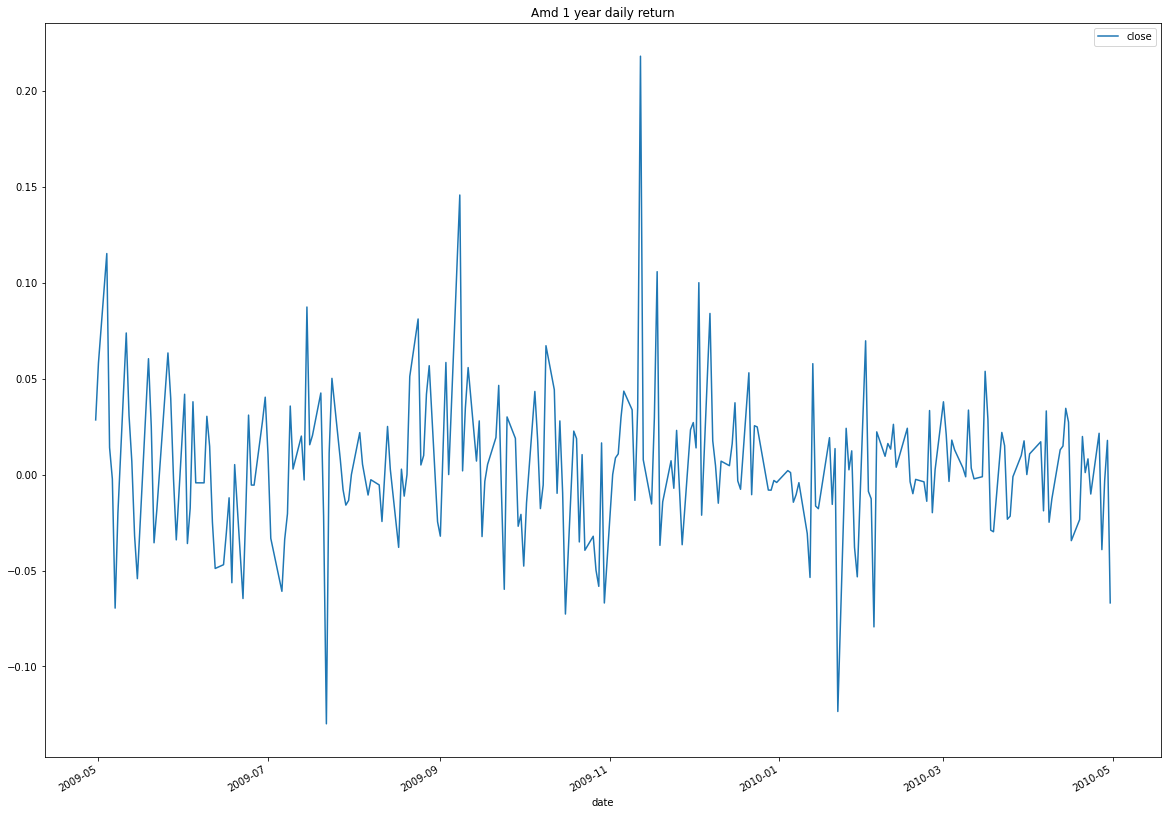

In [19]:
# Use the Pandas plot function to plot the daily return data for the 1-year time slice
# Adjust the figsize and be sure to include a plot title
# YOUR CODE HERE
amd_daily_return_1_year.plot(figsize=(20,15), title="Amd 1 year daily return")

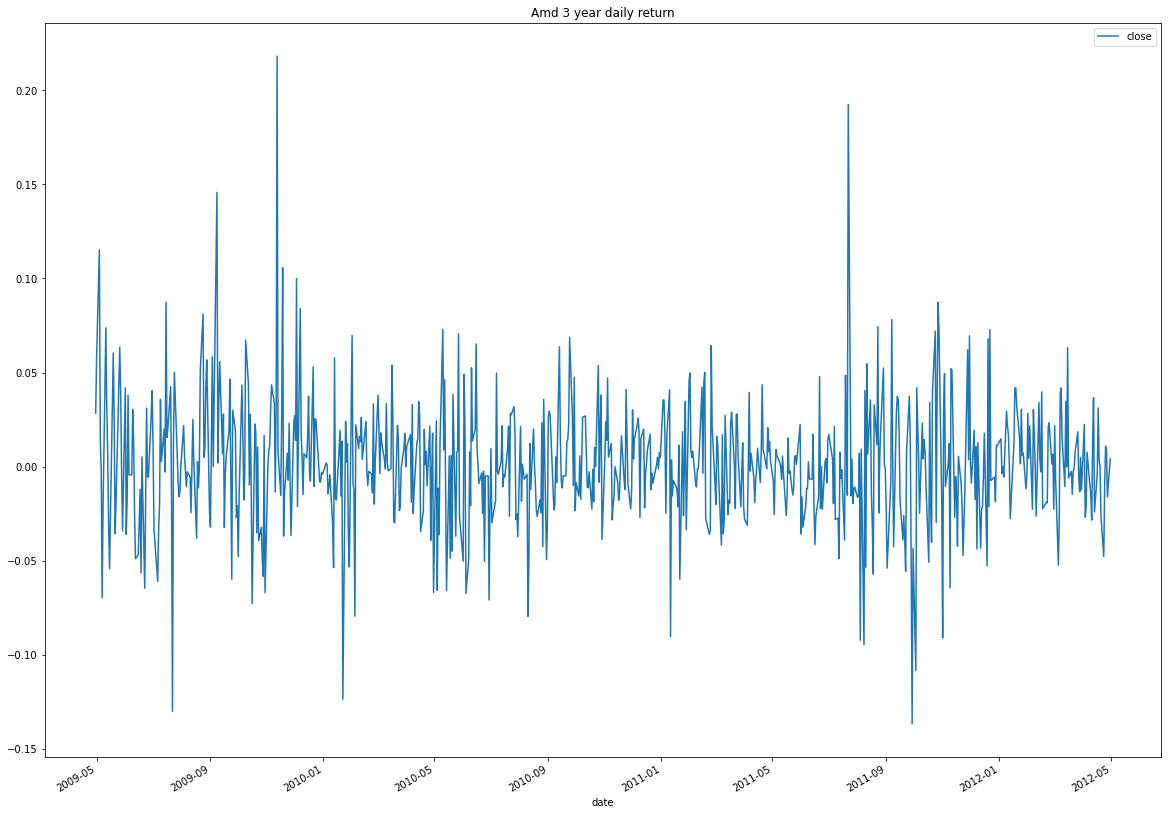

In [20]:
# Use the Pandas plot function to plot the daily return data for the 3-year time slice 
# Adjust the figsize and be sure to include a plot title
# YOUR CODE HERE
amd_daily_return_3_year.plot(figsize=(20,15), title="Amd 3 year daily return")

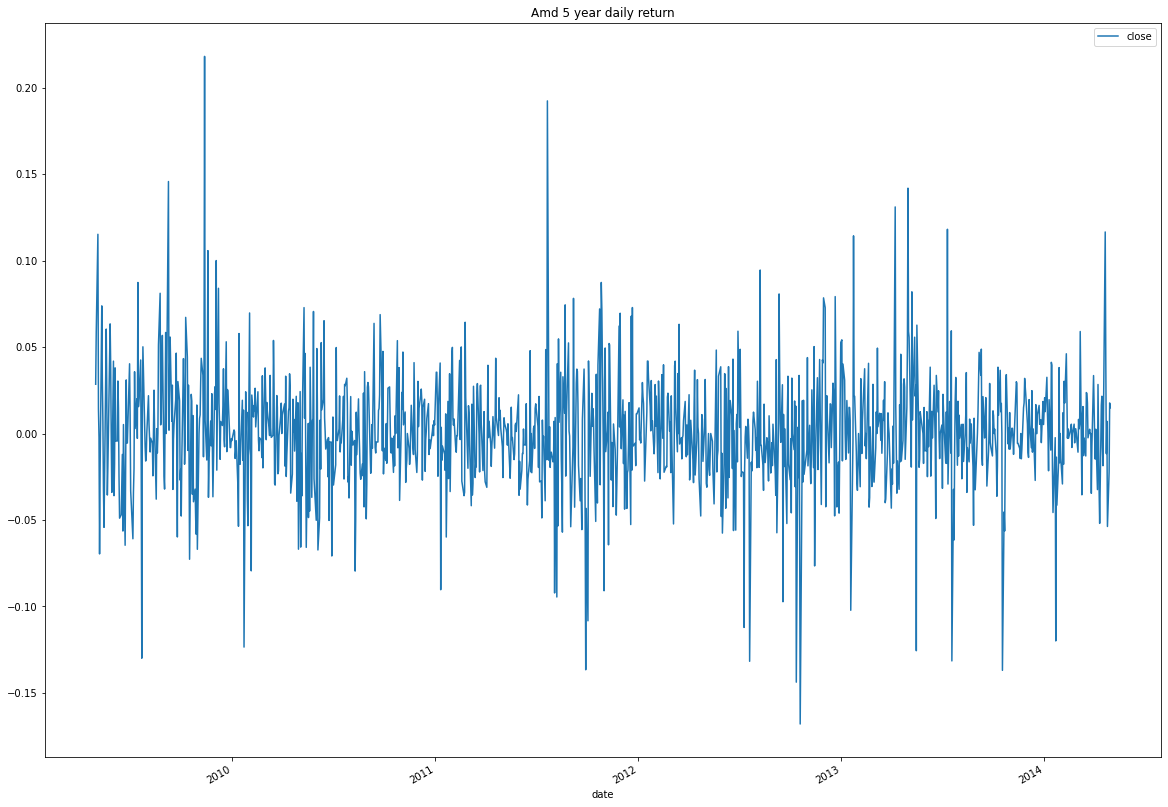

In [21]:
# Use the Pandas plot function to plot the daily return data for the 5-year time slice
# Adjust the figsize and be sure to include a plot title
# YOUR CODE HERE
amd_daily_return_5_year.plot(figsize=(20,15), title="Amd 5 year daily return")


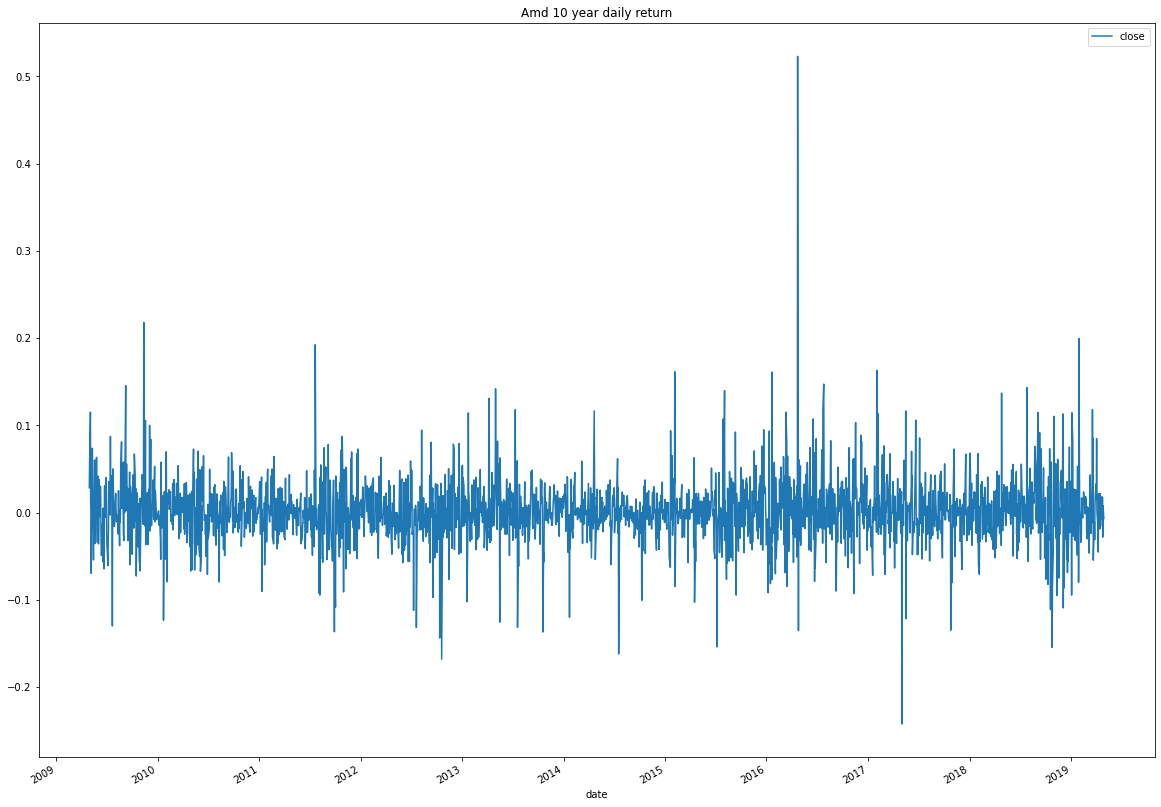

In [22]:
# Use the Pandas plot function to plot the daily return data for the 10-year time slice 
# Adjust the figsize and be sure to include a plot title 
# YOUR CODE HERE
amd_daily_return_10_year.plot(figsize=(20,15), title="Amd 10 year daily return")

## Step 10: Determine the time period that has the highest return value and the one that has the lowest. What are the implications of your findings?

**Question 1:** What are the average daily returns over each of the 1, 3, 5, and 10-year time slices? Which slice had the highest daily average return and which had the lowest?
 
**Answer 1:** # YOUR ANSWER HERE

**Question 2:** What insights could this provide with regard to trading AMD stock over the long vs. short-term?

**Answer 2:** # YOUR ANSWER HERE